**A. INITIAL HYPOTHESES:**

    1. Type of content & CTA affects engagement rate. 
    2. Humor content and ask-to-engage CTA is more likely to be engaged.

**B. DATA NORMALIZATION CATEGORIES (POST):**

    1. Type of content
        1. Promotion (events, giveaway, etc.)
        2. Warning
        3. Discussion
        4. Curhat
        5. Education
        6. Humor & Fun Fact
        7. 0 = Special/Celebration Day
    2. CTA
        1. Read More
        2. Ask to Register
        3. Ask to Engage
        4. 0 = No CTA
    3. Media Type
        1. Image
        2. Carousel
        3. Video

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns


Because this analysis is based on my previous internship experience, the data can't be published due to company privacy reasons.

In [ ]:
df=pd.read_csv("/content/210917_postperformance_jun_sept_2021.csv")

In [ ]:
df.head()

,time_posted,time,hour,image_url,ig_link,caption,med_type_id,engagement_rate,followers,impressions,reach,likes,comments,saves,vid_views,content_type_id,cta
0,"Jun 9, 2021 09:36:51 AM",9:36:51 AM,9,https://lg-image-prod.s3.amazonaws.com/ig-anal...,https://www.instagram.com/p/CP4gYrwrMAS/,"Waduuhh, agak galak yah balesnya🙈🙈🙈🙈\n\nBelom ...",2,0.0160,50381,27361,23580,778,43,163,NaN,6,3.0
1,"Jun 10, 2021 10:07:35 AM",10:07:35 AM,10,https://lg-image-prod.s3.amazonaws.com/ig-anal...,https://www.instagram.com/p/CP7IsxvLU6W/,"Indonesia.. eaa, eea, huuu! Siapa yang bacanya...",2,0.0057,50393,8905,7480,267,20,20,NaN,5,3.0
2,"Jun 10, 2021 05:31:35 PM",5:31:35 PM,17,https://lg-image-prod.s3.amazonaws.com/ig-anal...,https://www.instagram.com/p/CP77guVrWvY/,Mau rilis produk baru tapi takut nggak laku? B...,2,0.0030,50399,7128,5853,139,11,75,NaN,5,3.0
3,"Jun 11, 2021 10:21:48 AM",10:21:48 AM,10,https://lg-image-prod.s3.amazonaws.com/ig-anal...,https://www.instagram.com/p/CP9vHuyLnL4/,Misi… paket✨✨✨\n\nKayaknya kalau denger kata i...,2,0.0026,50398,8504,8072,131,0,6,NaN,6,3.0
4,"Jun 11, 2021 07:11:36 PM",7:11:36 PM,19,https://lg-image-prod.s3.amazonaws.com/ig-anal...,https://www.instagram.com/p/CP-rwIgL2v6/,Gimana niiii cara kamu menyapa pembeli???\n\nD...,2,0.0025,50401,7916,6538,124,3,92,NaN,5,3.0


**C. OVERVIEW CHARTS**

**Correlation Heat Map of Instagram Post Attributes**

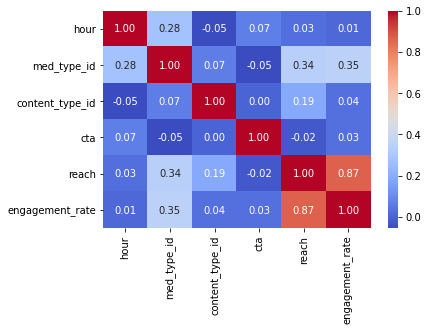

In [ ]:
g=sns.heatmap(df[["hour", "med_type_id", "content_type_id", "cta", "reach", "engagement_rate"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")

**Followers Online Activity Chart (Source: Later.com Analytics)**

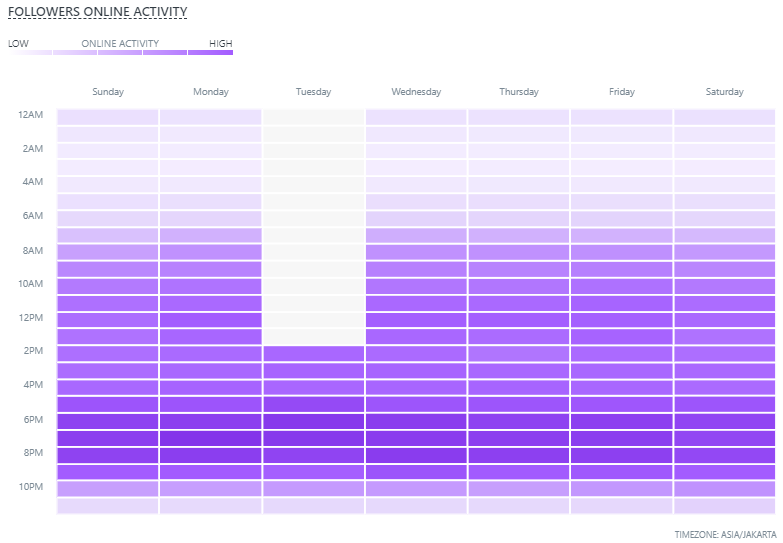

*   From the chart above, it can be noticed that the number of online audiences is high during 12-1 PM and 5-10 PM.
*   The number of reach should be directly proportional to the number of online audiences. So does the engagement rate, since generally it is highly correlated to the number of reach.
*   **The best time to share a post and story in order to gain maximum reach and engagement is during 12-1 PM and 5-10 PM.**

**D. INSTAGRAM POST: VIRALITY (REACH) ANALYSIS**

In [ ]:
df["content_type_id"].replace({0:"Special Day",1:"Promotion",2:"Warning",3:"Discussion",4:"Curhat",5:"Education",6:"Fun Fact"}, inplace=True)

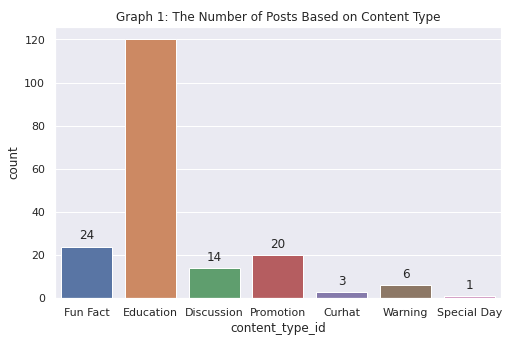

In [ ]:
# Count plot on content type categories
sns.set(rc={"figure.figsize":(8, 5)})
count=sns.countplot(x ='content_type_id', data = df)
for p in count.patches:
    count.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top')
# Show the plot 
plt.title("Graph 1: The Number of Posts Based on Content Type")
plt.show() 

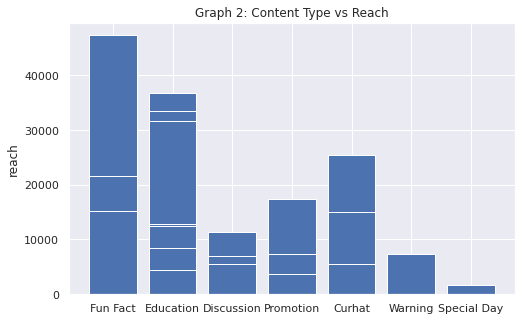

In [ ]:
# Bar plot indicating reach
plt.bar(df["content_type_id"], df["reach"])
plt.ylabel("reach")
plt.title("Graph 2: Content Type vs Reach")
plt.show()

From the bar plot above, it is clear that **the content types with the most reach are Fun Fact, Education, and Curhat.**

**By Media Type**

[Text(0.5, 1.0, 'Graph 3: Reach Based on Content & Media Type')]

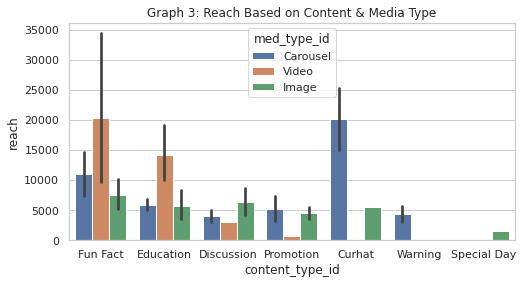

In [ ]:
df["med_type_id"].replace({1:"Image",2:"Carousel",3:"Video"}, inplace=True)

sns.set(style="whitegrid", rc={"figure.figsize":(8, 4)})
tips = sns.load_dataset("tips")
sns.barplot(x=df["content_type_id"], y=df["reach"], hue=df["med_type_id"], data=tips).set(title='Graph 3: Reach Based on Content & Media Type')



*   From the bar plot above, it can be noticed that **the Fun Fact and Education 'video' posts gained more reach** than the image and carousel media type.
*   When it is observed carefully, **the kind of video that is usually posted by 'haibolu' and gained most reach is TikTok-reposted video.**
*   There is a spike in Curhat 'carousel' posts, but it can be considered not significant since the number of Curhat posts is only 3 (refer to Graph 1).
*   There are no significant differences in the other content types.

**By CTA Type**

[Text(0.5, 1.0, 'Graph 4: Reach Based on Content & CTA Type')]

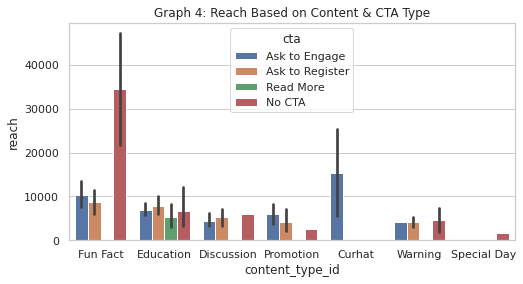

In [ ]:
df["cta"].replace({0: "No CTA", 1:"Read More",2:"Ask to Register",3:"Ask to Engage"}, inplace=True)

sns.set(style="whitegrid", rc={"figure.figsize":(8, 4)})
tips = sns.load_dataset("tips")
sns.barplot(x=df["content_type_id"], y=df["reach"], hue=df["cta"], data=tips).set(title='Graph 4: Reach Based on Content & CTA Type')

*   From the bar plot above, it can be noticed that the Fun Fact posts with no CTA in copywriting gained more reach than the other types of CTA.
*   Curhat posts with 'Ask-to-Engage' CTA has a great amount of reach.

**E. INSTAGRAM POST: ENGAGEMENT ANALYSIS**

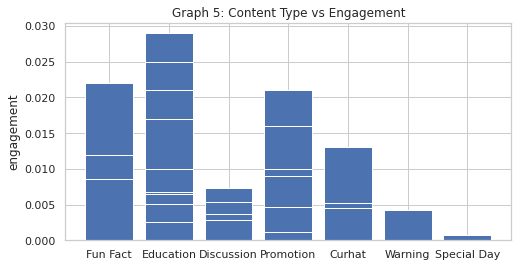

In [ ]:
# Bar plot indicating engagement
plt.bar(df["content_type_id"], df["engagement"])
plt.ylabel("engagement")
plt.title("Graph 5: Content Type vs Engagement")
plt.show()

*   From the bar plot above, it is clear that **the content types with the most engagement are Education, Fun Fact, and Promotion.**
*   When it is observed carefully, the kind of promotion post that is usually gained most engagement is giveaway post.

**By Media Type**

[Text(0.5, 1.0, 'Graph 6: Engagement Based on Content & Media Type')]

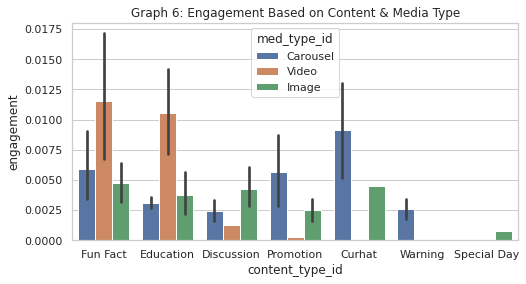

In [ ]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["content_type_id"], y=df["engagement"], hue=df["med_type_id"], data=tips).set(title='Graph 6: Engagement Based on Content & Media Type')

*   From the bar plot above, it can be noticed that the **Fun Fact and Education 'video' posts gained more engagement** than the image and carousel media type.
*   There are no significant differences in the other content types.

**By CTA Type**

[Text(0.5, 1.0, 'Graph 7: Engagement Based on Content & CTA Type')]

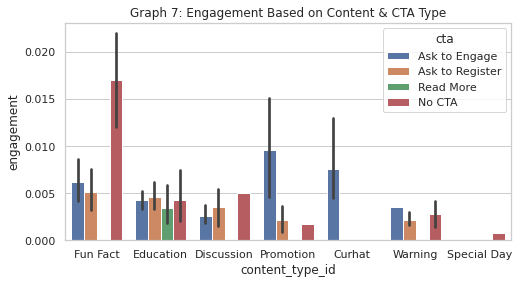

In [ ]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["content_type_id"], y=df["engagement"], hue=df["cta"], data=tips).set(title='Graph 7: Engagement Based on Content & CTA Type')

*   From the bar plot above, it can be noticed that **the Promotion and Curhat posts with 'Ask-to-Engage' CTA in copywriting gained a great amount of engagement.**
*   The Fun Fact posts with no CTA in copywriting gained more reach than the other types of CTA.